# Scaling

In [1]:
from imports import *

# set columnns display format
pd.set_option('display.max_columns', None)
# default pandas decimal number display format
# pd.options.display.float_format = '{:20,.3f}'.format

In [2]:
# import raw, messy data
df = acquire.get_zillow_data()

In [3]:
df = prepare.prep_zillow(df)

In [4]:
train, validate, test = prepare.split_scale(df)

In [5]:
# Copy a new dataframe to perform feature engineering
scaled_df = df.copy()

# Initiate MinMaxScaler
scaler = MinMaxScaler()

# Fit numerical features to scaler
scaler.fit(scaled_df[['bathrooms', 'bedrooms', 'total_sqft', 'living_sqft', 'full_bath',
       'latitude', 'longitude', 'lot_sqft', 'roomcnt',
       'structure_value', 'assessed_value', 'land_value', 'taxamount', 'age']])

# Set the features to transformed value
scaled_df[['bathrooms', 'bedrooms', 'total_sqft', 'living_sqft', 'full_bath',
       'latitude', 'longitude', 'lot_sqft', 'roomcnt',
       'structure_value', 'assessed_value', 'land_value', 'taxamount', 'age']] = scaler.transform(scaled_df[['bathrooms', 'bedrooms', 'total_sqft', 'living_sqft', 'full_bath',
       'latitude', 'longitude', 'lot_sqft', 'roomcnt',
       'structure_value', 'assessed_value', 'land_value', 'taxamount', 'age']])

# Split the scaled data into train, validate, test
train, validate, test = prepare.split(scaled_df)

# # Split each dataset into X, y
# cols = ['bathrooms', 'bedrooms', 'total_sqft', 'living_sqft', 'full_bath',
#         'latitude', 'longitude', 'lot_sqft', 'roomcnt', 'zip_code',
#         'structure_value', 'assessed_value', 'land_value', 'taxamount', 'age', 'county_Los Angeles',
#         'county_Orange', 'county_Ventura']
# X_train = s_train[cols]
# y_train = s_train.logerror
# X_validate = s_validate[cols] 
# y_validate = s_validate.logerror
# X_test = s_test[cols]
# y_test = s_test.logerror

In [164]:
def split_scale(df):
    # Copy a new dataframe to perform feature engineering
    scaled_df = df.copy()

    # Initiate MinMaxScaler
    scaler = MinMaxScaler()

    # Fit numerical features to scaler
    scaler.fit(scaled_df[['bathrooms', 'bedrooms', 'total_sqft', 'living_sqft', 'full_bath',
       'latitude', 'longitude', 'lot_sqft', 'roomcnt',
       'structure_value', 'assessed_value', 'land_value', 'taxamount', 'age']])

    # Set the features to transformed value
    scaled_df[['bathrooms', 'bedrooms', 'total_sqft', 'living_sqft', 'full_bath',
       'latitude', 'longitude', 'lot_sqft', 'roomcnt',
       'structure_value', 'assessed_value', 'land_value', 'taxamount', 'age']] = scaler.transform(scaled_df[['bathrooms', 'bedrooms', 'total_sqft', 'living_sqft', 'full_bath',
       'latitude', 'longitude', 'lot_sqft', 'roomcnt',
       'structure_value', 'assessed_value', 'land_value', 'taxamount', 'age']])

    # Split the scaled data into train, validate, test
    train, validate, test = prepare.split(scaled_df)
    return train, validate, test

# Clustering

## Approaches / Clusters to try:
- **Location** (`latitude`, `longitude`, `county`, `zip_code`)
- **Age** (`age`)
- **Area** (`total_sqft`, `living_sqft`, `lot_sqft`)
- **Size (rooms)** (`bedrooms`, `bathrooms`, `full_bath`, `roomcnt`)
- **Value** (`structure_value`, `assessed_value`,`land_value`, `taxamount`)

## Location Cluster

<span style='background :yellow' >**latitude, longitude, zip_code(dummies), k=3**</span>

In [6]:
train.columns

Index(['parcelid', 'bathrooms', 'bedrooms', 'total_sqft', 'living_sqft',
       'full_bath', 'latitude', 'longitude', 'lot_sqft', 'roomcnt',
       'structure_value', 'assessed_value', 'land_value', 'taxamount',
       'logerror', 'age', 'taxrate', 'county', 'transaction_month',
       'county_Los Angeles', 'county_Orange', 'county_Ventura', 'zip_code',
       'zip_bin', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high', 'zip_bin_sgfnt low'],
      dtype='object')

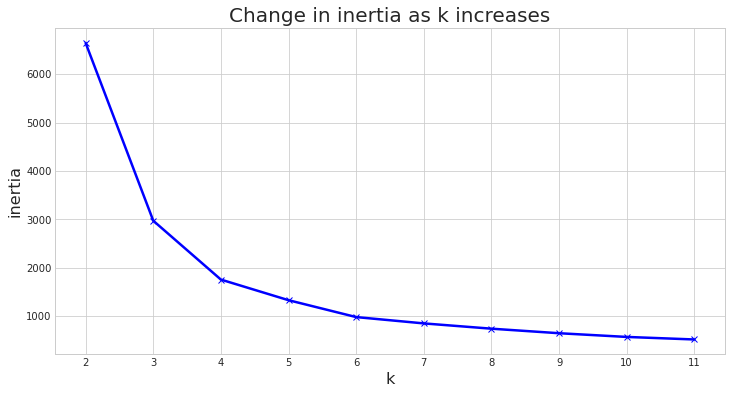

In [6]:
# Select features for cluster
cluster_vars = train[['latitude', 'longitude', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [7]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_a'] = location_clusters
train.head()

,parcelid,bathrooms,bedrooms,total_sqft,living_sqft,full_bath,latitude,longitude,lot_sqft,roomcnt,structure_value,assessed_value,land_value,taxamount,logerror,age,taxrate,county,transaction_month,county_Los Angeles,county_Orange,county_Ventura,zip_code,zip_bin,zip_bin_insgfnt high,zip_bin_insgfnt low,zip_bin_sgfnt high,zip_bin_sgfnt low,location_clusters_a
36408,11852584,0.166667,0.333333,0.223146,0.223146,0.166667,0.489849,0.722683,0.142086,0.000000,0.249999,0.369648,0.219774,0.190572,0.008887,0.426471,1.512845,Los Angeles,7,1,0,0,90640,insgfnt high,1,0,0,0,1
38129,12470054,0.166667,0.333333,0.115889,0.115889,0.166667,0.361449,0.689920,0.131308,0.000000,0.064824,0.161569,0.149200,0.080098,-0.032206,0.448529,1.306395,Los Angeles,8,1,0,0,90712,insgfnt high,1,0,0,0,1
26349,14033839,0.166667,0.333333,0.155691,0.155691,0.166667,0.279580,0.811640,0.130391,0.583333,0.127344,0.445221,0.387142,0.170193,-0.003708,0.338235,1.141333,Orange,6,0,1,0,92708,insgfnt low,0,1,0,0,0
31869,17194875,0.250000,0.500000,0.418958,0.418958,0.166667,0.605691,0.264698,0.202229,0.666667,0.715666,0.847915,0.352102,0.300011,0.007720,0.095588,1.095202,Ventura,7,0,0,1,91320,insgfnt low,0,1,0,0,0
24862,11903595,0.166667,0.333333,0.187020,0.187020,0.166667,0.532605,0.693399,0.118126,0.000000,0.135567,0.445165,0.380948,0.178279,0.033695,0.477941,1.195283,Los Angeles,6,1,0,0,91803,insgfnt high,1,0,0,0,1


In [8]:
train.groupby('location_clusters_a').logerror.mean()

location_clusters_a
0    0.010163
1    0.027405
2    0.008727
Name: logerror, dtype: float64

<AxesSubplot:xlabel='location_clusters_a', ylabel='logerror'>

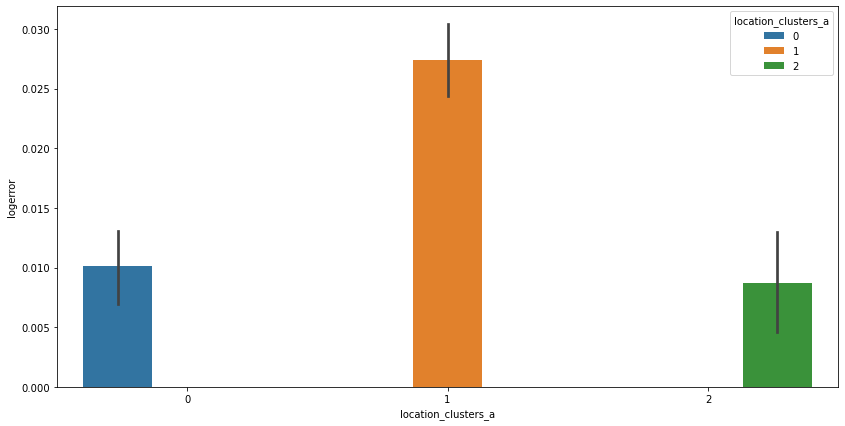

In [9]:
plt.figure(figsize = (14,7))
sns.barplot(x='location_clusters_a', y=
            'logerror', hue='location_clusters_a', data = train)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

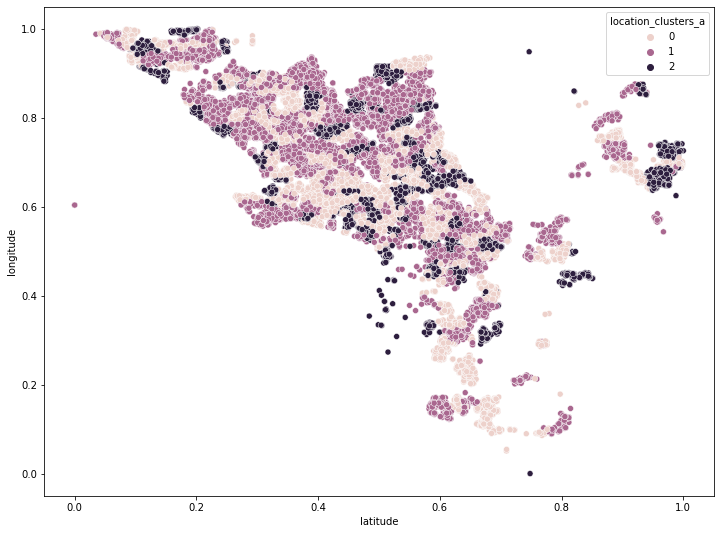

In [10]:
plt.figure(figsize = (12,9))
sns.scatterplot(x='latitude', y='longitude', hue = 'location_clusters_a', data=train)

### ANOVA Test
**Set Hypothesis**

$H_{0}$: Logerror of three different clusters are all equal.

$H_{a}$: Logerror of three different clusters are not all equal.


**Verify Assumptions**

- Normal: Yes
- Independent: Yes
- Variance: False

In [11]:
# Set alpha
alpha = 0.05
cluster0 = train[train.location_clusters_a==0].logerror
cluster1 = train[train.location_clusters_a==1].logerror
cluster2 = train[train.location_clusters_a==2].logerror
# Comparing mean of 3 independent samples
t, p = stats.f_oneway(cluster0, cluster1, cluster2)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE + '\nMean of 3 location clusters are not all equal. ')
else:
    print("We fail to reject H0")

We reject H0.

Mean of 3 location clusters are not all equal. 


<span style='background :red' >**latitude, longitude, zip_code(dummies), k=4**</span>

In [12]:
# Create clusters and fit cluster model
cluster_vars = train[['latitude', 'longitude', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_b'] = location_clusters

<AxesSubplot:xlabel='location_clusters_b', ylabel='logerror'>

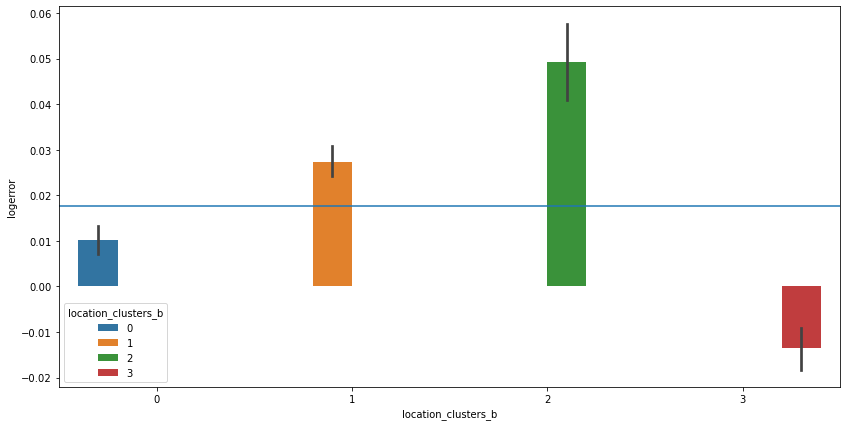

In [13]:
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_b', y=
            'logerror', hue='location_clusters_b', data = train)

<span style='background :yellow' >**latitude, longitude, zip_code(dummies), k=5**</span>

<AxesSubplot:xlabel='location_clusters_c', ylabel='logerror'>

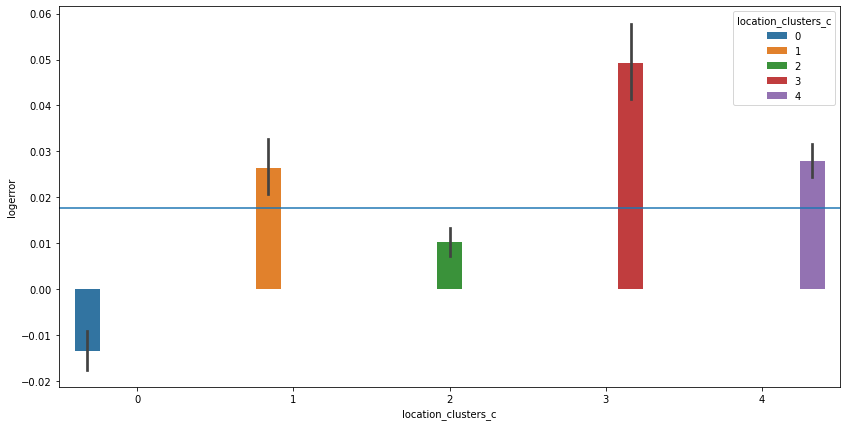

In [14]:
# Create clusters and fit cluster model
cluster_vars = train[['latitude', 'longitude', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_c'] = location_clusters
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_c', y=
            'logerror', hue='location_clusters_c', data = train)

<span style='background :yellow' >**zip_code, county(dummies), k=3**</span>

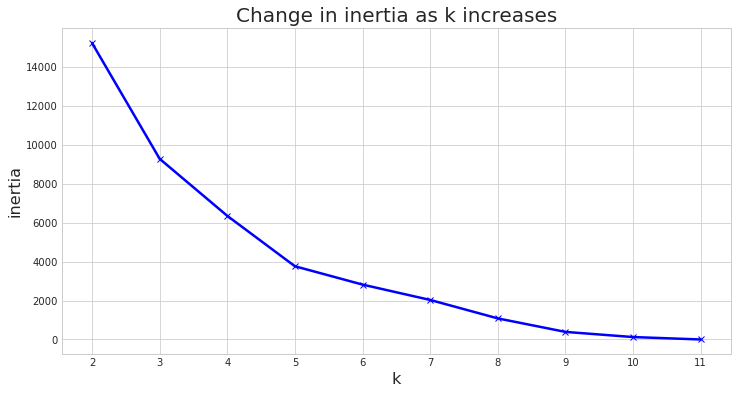

In [15]:
# Select features for cluster
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [16]:
# Create clusters and fit cluster model
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_d'] = location_clusters
train.groupby('location_clusters_d').logerror.mean()

location_clusters_d
0    0.027825
1    0.006586
2    0.024800
Name: logerror, dtype: float64

<AxesSubplot:xlabel='location_clusters_d', ylabel='logerror'>

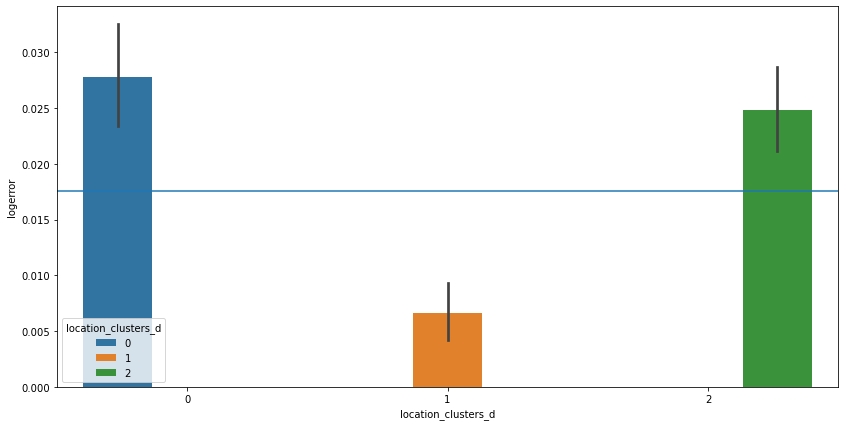

In [17]:
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_d', y=
            'logerror', hue='location_clusters_d', data = train)

<span style='background :yellow' >**zip_code, county(dummies), k=4**</span>

In [18]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_e'] = location_clusters
train.groupby('location_clusters_e').logerror.mean()

location_clusters_e
0    0.024800
1    0.027825
2    0.008969
3    0.002800
Name: logerror, dtype: float64

<AxesSubplot:xlabel='location_clusters_e', ylabel='logerror'>

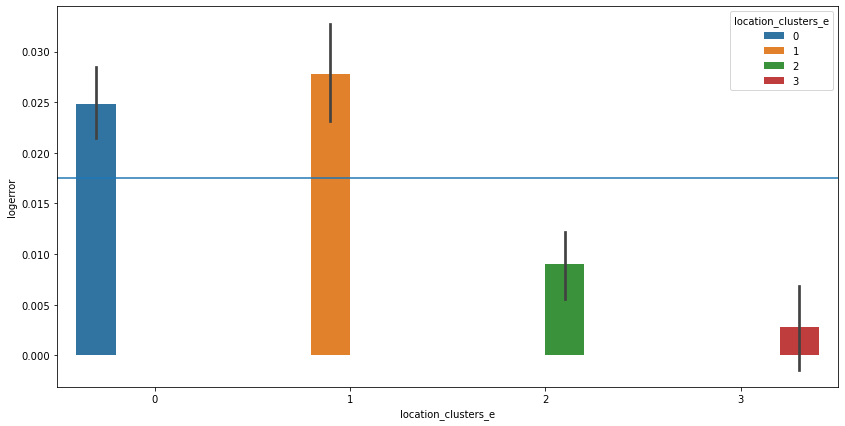

In [19]:
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_e', y=
            'logerror', hue='location_clusters_e', data = train)

<span style='background :red' >**zip_code, county(dummies), k=5**</span>

In [20]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=5)
kmeans.fit(cluster_vars)
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_f'] = location_clusters
train.groupby('location_clusters_f').logerror.mean()

location_clusters_f
0    0.007881
1    0.024800
2    0.033393
3    0.002800
4    0.014222
Name: logerror, dtype: float64

<AxesSubplot:xlabel='location_clusters_f', ylabel='logerror'>

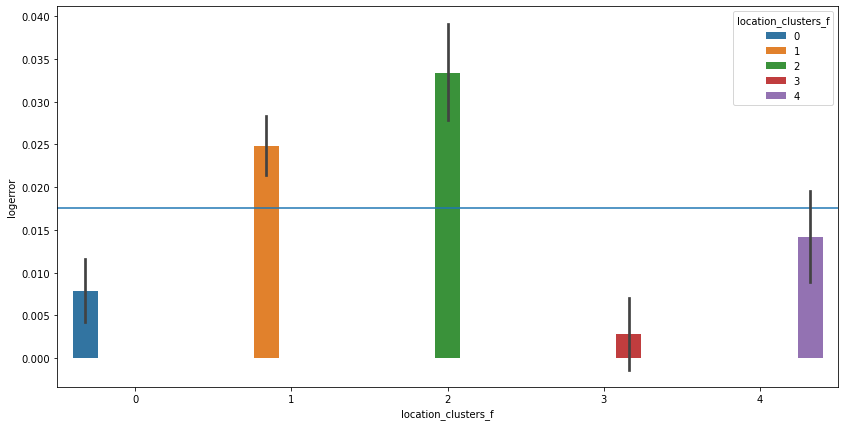

In [21]:
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_f', y=
            'logerror', hue='location_clusters_f', data = train)

<span style='background :yellow' >**zip_code, county(dummies), k=6**</span>

<AxesSubplot:xlabel='location_clusters_g', ylabel='logerror'>

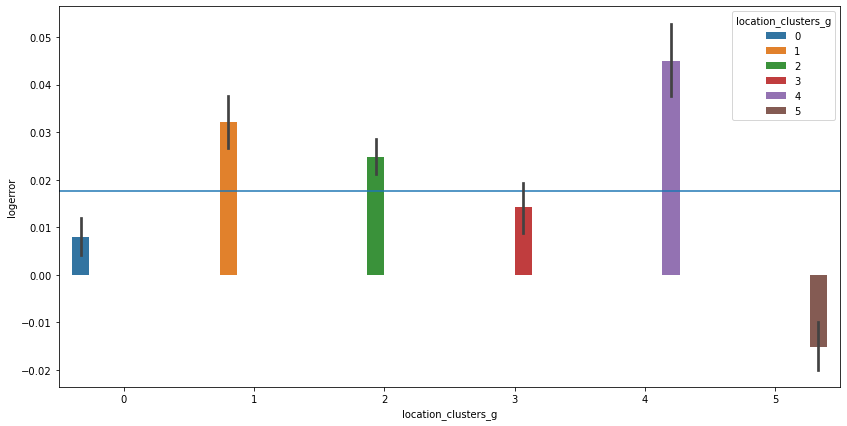

In [22]:
# Create clusters and fit cluster model
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
kmeans = KMeans(n_clusters=6)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_g'] = location_clusters
train.groupby('location_clusters_g').logerror.mean()
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_g', y=
            'logerror', hue='location_clusters_g', data = train)

<span style='background :yellow' >**zip_code, county(dummies), k=7**</span>

<AxesSubplot:xlabel='location_clusters_h', ylabel='logerror'>

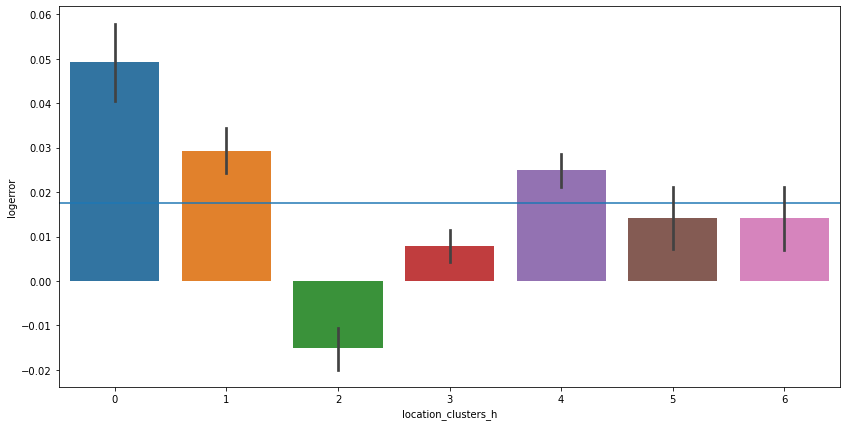

In [23]:
# Create clusters and fit cluster model
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
kmeans = KMeans(n_clusters=7)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_h'] = location_clusters
train.groupby('location_clusters_h').logerror.mean()
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_h', y=
            'logerror', data = train)

<span style='background :yellow' >**zip_code, county(dummies), k=8**</span>

<AxesSubplot:xlabel='location_clusters_i', ylabel='logerror'>

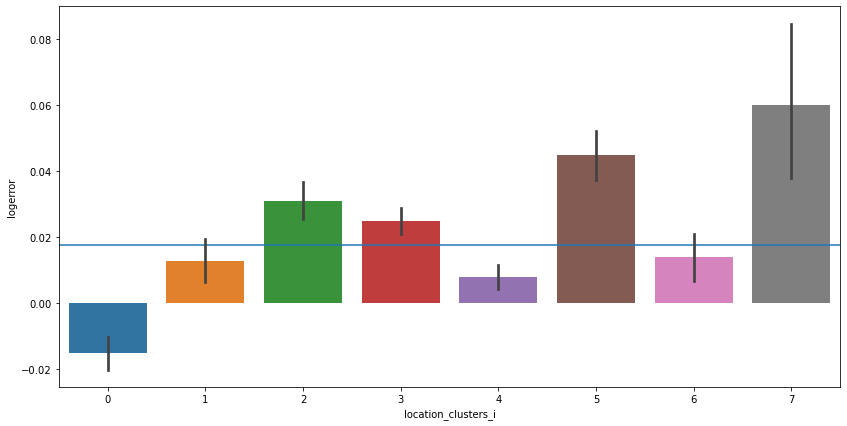

In [24]:
# Create clusters and fit cluster model
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
kmeans = KMeans(n_clusters=8)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_i'] = location_clusters
train.groupby('location_clusters_i').logerror.mean()
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_i', y=
            'logerror', data = train)

<span style='background :yellow' >**zip_code, county(dummies), k=9**</span>

<AxesSubplot:xlabel='location_clusters_j', ylabel='logerror'>

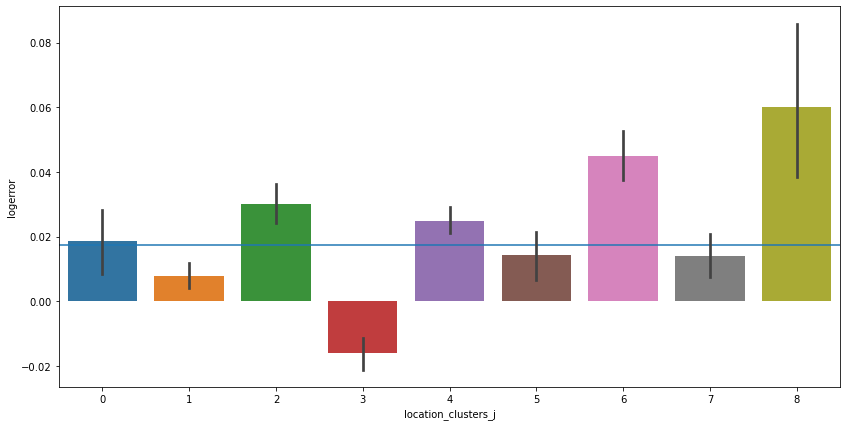

In [25]:
# Create clusters and fit cluster model
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'zip_bin_insgfnt high', 'zip_bin_insgfnt low',
       'zip_bin_sgfnt high']]
kmeans = KMeans(n_clusters=9)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_j'] = location_clusters
train.groupby('location_clusters_j').logerror.mean()
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_j', y=
            'logerror', data = train)

<span style='background :yellow' >**latitude, longitude, conuty(dummies), k=3**</span>

In [26]:
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'latitude', 'longitude']]

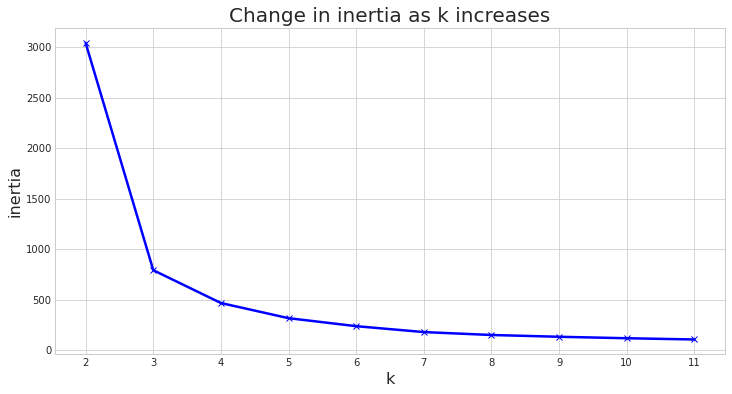

In [27]:
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [28]:
# Create clusters and fit cluster model
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'latitude', 'longitude']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)

location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_k'] = location_clusters
train.groupby('location_clusters_k').logerror.mean()

location_clusters_k
0    0.013415
1    0.027825
2    0.016211
Name: logerror, dtype: float64

<AxesSubplot:xlabel='location_clusters_k', ylabel='logerror'>

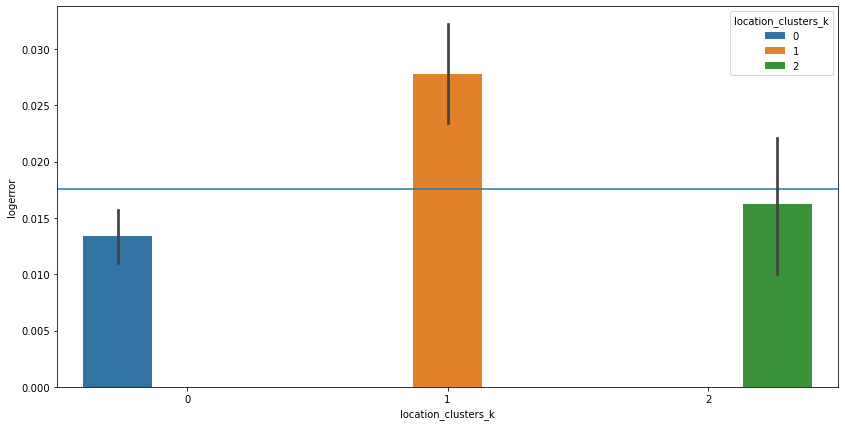

In [29]:
plt.figure(figsize = (14,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='location_clusters_k', y=
            'logerror', hue='location_clusters_k', data = train)

In [30]:
# Set alpha
alpha = 0.05
cluster0 = train[train.location_clusters_e==0].logerror
cluster1 = train[train.location_clusters_e==1].logerror
cluster2 = train[train.location_clusters_e==2].logerror
# Comparing mean of 3 independent samples
t, p = stats.f_oneway(cluster0, cluster1, cluster2)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE + '\nMean of 3 location clusters are not all equal. ')
else:
    print("We fail to reject H0")

We reject H0.

Mean of 3 location clusters are not all equal. 


**However, cluster 0 and 2 is not significantly different.**

<span style='background :yellow' >**latitude, longitude, conuty(dummies), k=4**</span>

In [31]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['county_Los Angeles', 'county_Orange', 'latitude', 'longitude']]
location_clusters = kmeans.predict(cluster_vars)
train['location_clusters_l'] = location_clusters
train.groupby('location_clusters_l').logerror.mean()

location_clusters_l
0    0.012866
1    0.027825
2    0.016211
3    0.014361
Name: logerror, dtype: float64

<AxesSubplot:xlabel='location_clusters_l', ylabel='logerror'>

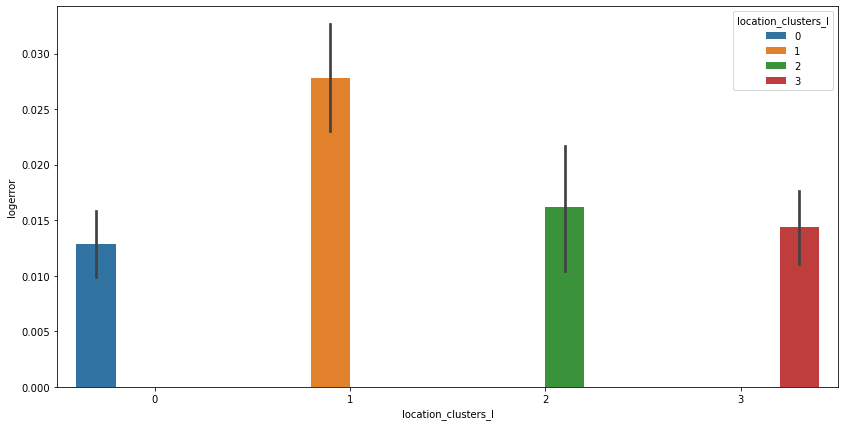

In [32]:
plt.figure(figsize = (14,7))
sns.barplot(x='location_clusters_l', y=
            'logerror', hue='location_clusters_l', data = train)

***

## Age Cluster

<span style='background :yellow' >**age, k=3**</span>

In [33]:
cluster_vars = train[['age']]

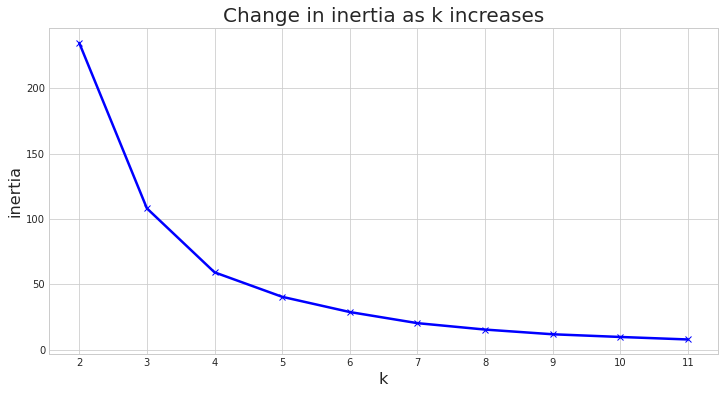

In [34]:
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [35]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)
cluster_vars = train[['age']]
age_clusters = kmeans.predict(cluster_vars)
train['age_clusters_a'] = age_clusters
train.groupby('location_clusters_a').logerror.mean()

location_clusters_a
0    0.010163
1    0.027405
2    0.008727
Name: logerror, dtype: float64

<AxesSubplot:xlabel='age', ylabel='logerror'>

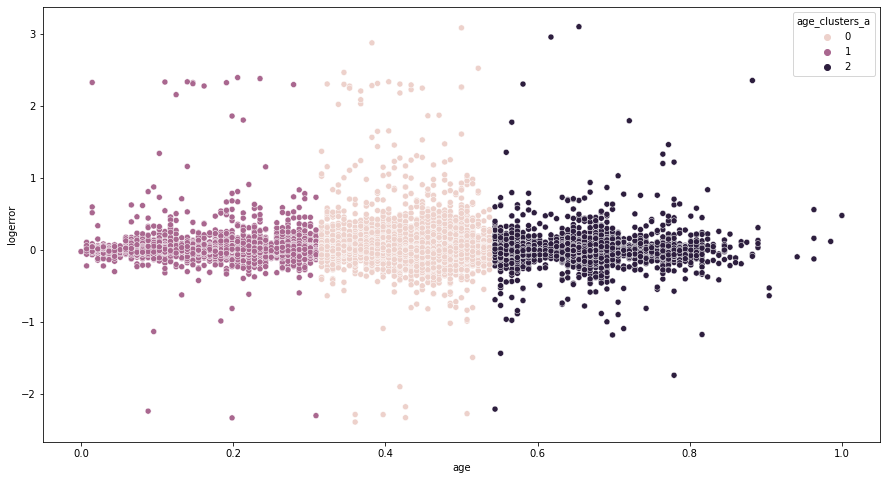

In [36]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='age', y='logerror', hue='age_clusters_a', data=train)

In [37]:
# Set alpha
alpha = 0.05
cluster0 = train[train.age_clusters_a==0].logerror
cluster1 = train[train.age_clusters_a==1].logerror
cluster2 = train[train.age_clusters_a==2].logerror
# Comparing mean of 3 independent samples
t, p = stats.f_oneway(cluster0, cluster1, cluster2)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE + '\nMean of 3 location clusters are not all equal. ')
else:
    print("We fail to reject H0")

We reject H0.

Mean of 3 location clusters are not all equal. 


<AxesSubplot:xlabel='age_clusters_a', ylabel='logerror'>

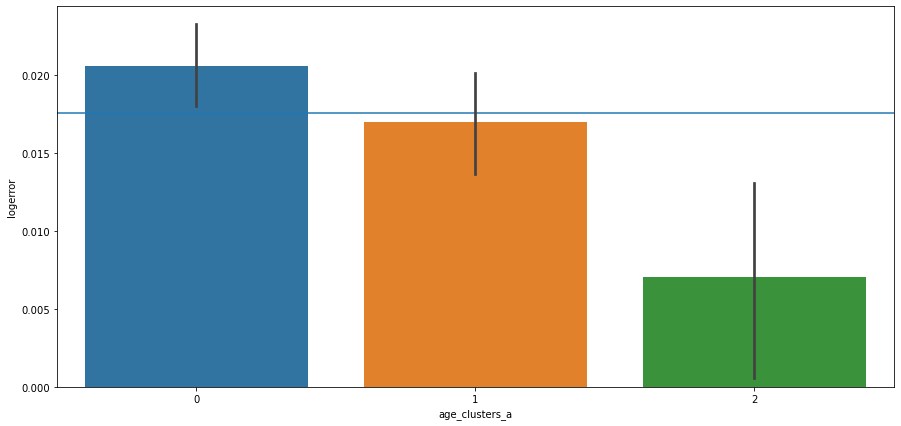

In [39]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='age_clusters_a', y='logerror', data = train)

<span style='background :yellow' >**age, k=4**</span>

In [40]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['age']]
age_clusters = kmeans.predict(cluster_vars)
train['age_clusters_b'] = age_clusters
train.groupby('age_clusters_b').logerror.mean()

age_clusters_b
0    0.023436
1    0.017033
2    0.009459
3    0.015724
Name: logerror, dtype: float64

<AxesSubplot:xlabel='age', ylabel='logerror'>

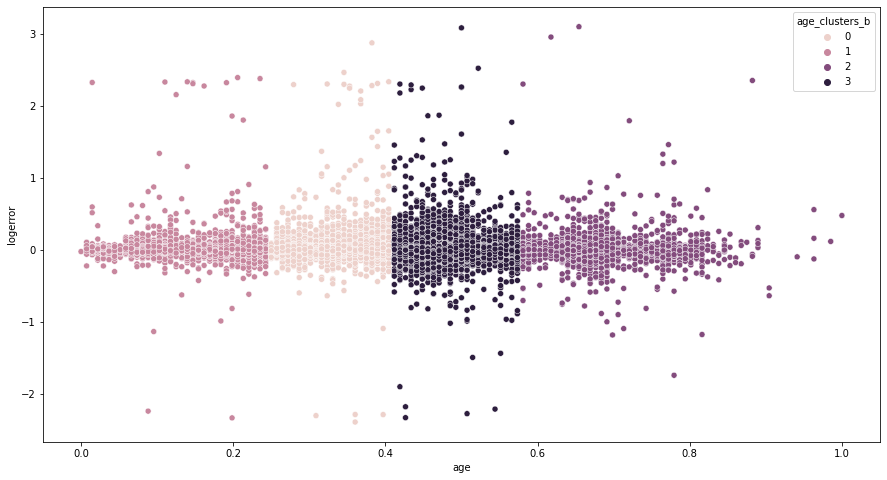

In [41]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='age', y='logerror', hue='age_clusters_b', data=train)

<AxesSubplot:xlabel='age_clusters_b', ylabel='logerror'>

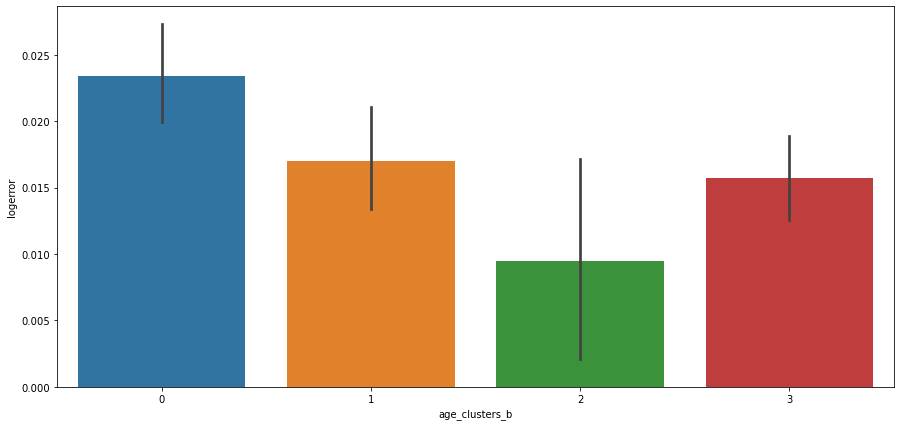

In [42]:
plt.figure(figsize = (15,7))
sns.barplot(x='age_clusters_b', y='logerror', data = train)

***

## Area Cluster

<span style='background :yellow' >**Area: total_sqft, lot_sqft, k==3**</span>

In [43]:
cluster_vars = train[['total_sqft', 'lot_sqft']]

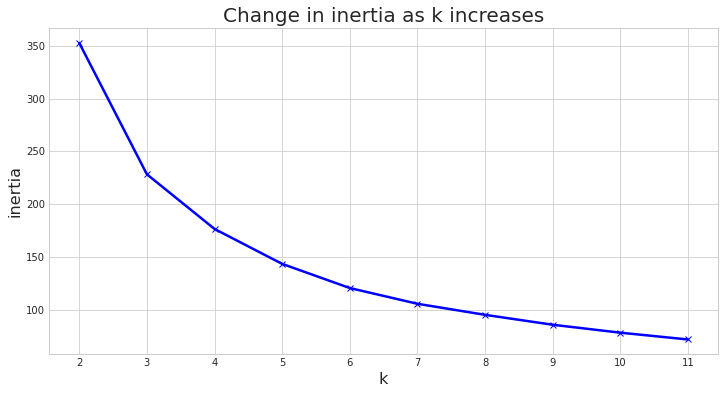

In [44]:
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [45]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)
cluster_vars = train[['total_sqft', 'lot_sqft']]
area_clusters = kmeans.predict(cluster_vars)
train['area_clusters_a'] = area_clusters
train.groupby('area_clusters_a').logerror.mean()

area_clusters_a
0    0.028302
1    0.014901
2    0.022655
Name: logerror, dtype: float64

<AxesSubplot:xlabel='area_clusters_a', ylabel='logerror'>

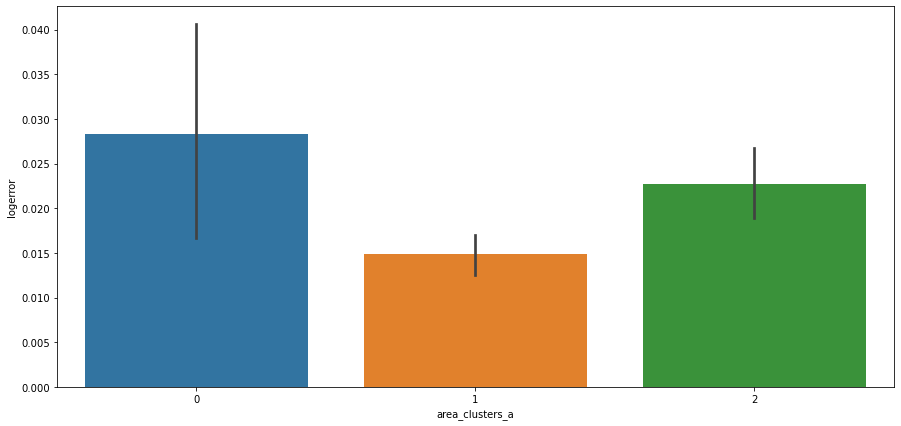

In [46]:
plt.figure(figsize = (15,7))
sns.barplot(x='area_clusters_a', y='logerror', data = train)

<AxesSubplot:xlabel='total_sqft', ylabel='lot_sqft'>

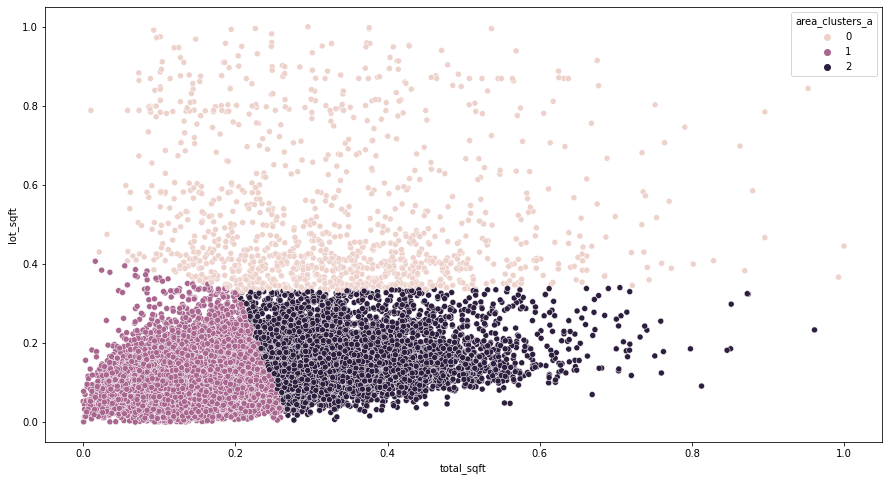

In [47]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='total_sqft', y='lot_sqft', hue='area_clusters_a', data=train)

In [48]:
# Set alpha
alpha = 0.05
cluster0 = train[train.area_clusters_a==0].logerror
cluster1 = train[train.area_clusters_a==1].logerror
cluster2 = train[train.area_clusters_a==2].logerror
# Comparing mean of 3 independent samples
t, p = stats.f_oneway(cluster0, cluster1, cluster2)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE + '\nMean of 3 area clusters are not all equal. ')
else:
    print("We fail to reject H0")

We reject H0.

Mean of 3 area clusters are not all equal. 


<span style='background :yellow' >**Area: total_sqft, lot_sqft, k==4**</span>

In [49]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['total_sqft', 'lot_sqft']]
area_clusters = kmeans.predict(cluster_vars)
train['area_clusters_b'] = area_clusters
train.groupby('area_clusters_b').logerror.mean()

area_clusters_b
0    0.018953
1    0.024223
2    0.024650
3    0.014689
Name: logerror, dtype: float64

<AxesSubplot:xlabel='area_clusters_b', ylabel='logerror'>

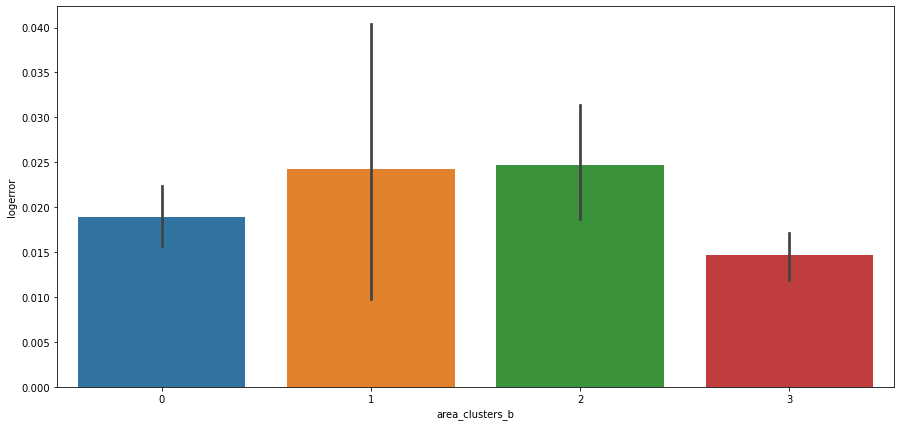

In [50]:
plt.figure(figsize = (15,7))
sns.barplot(x='area_clusters_b', y='logerror', data = train)

**NOTE: Cluster 2 and 3 hardly have any difference.We will pass on this cluster.**

<span style='background :red' >**Area: total_sqft, lot_sqft, living_sqft, k==3**</span>

In [51]:
cluster_vars = train[['total_sqft', 'lot_sqft', 'living_sqft']]

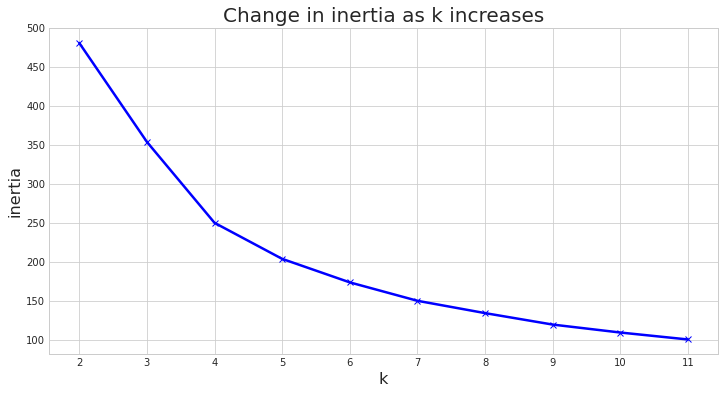

In [52]:
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [53]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)
cluster_vars = train[['total_sqft', 'lot_sqft', 'living_sqft']]
area_clusters = kmeans.predict(cluster_vars)
train['area_clusters_c'] = area_clusters
train.groupby('area_clusters_c').logerror.mean()

area_clusters_c
0    0.022514
1    0.014926
2    0.029440
Name: logerror, dtype: float64

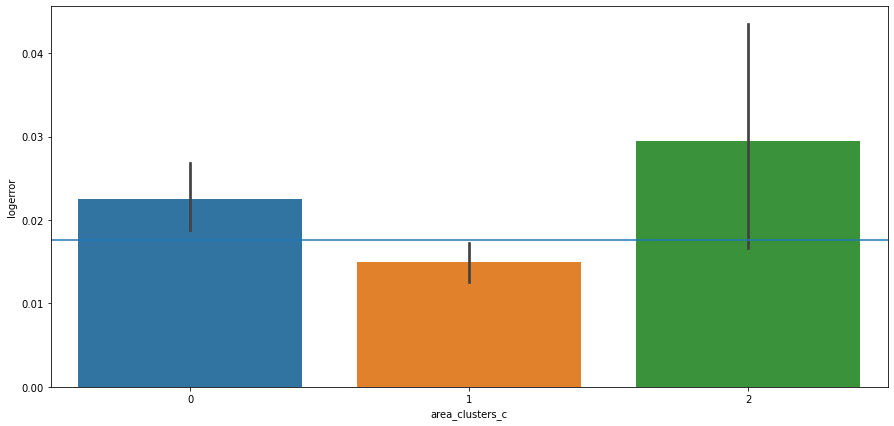

In [54]:
plt.figure(figsize = (15,7))
sns.barplot(x='area_clusters_c', y='logerror', data = train)
plt.axhline(train.logerror.mean())

<span style='background :yellow' >**Area: total_sqft, lot_sqft, living_sqft, k==4**</span>

In [55]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['total_sqft', 'lot_sqft', 'living_sqft']]
area_clusters = kmeans.predict(cluster_vars)
train['area_clusters_d'] = area_clusters
train.groupby('area_clusters_d').logerror.mean()

area_clusters_d
0    0.018047
1    0.014890
2    0.028540
3    0.017772
Name: logerror, dtype: float64

<AxesSubplot:xlabel='area_clusters_d', ylabel='logerror'>

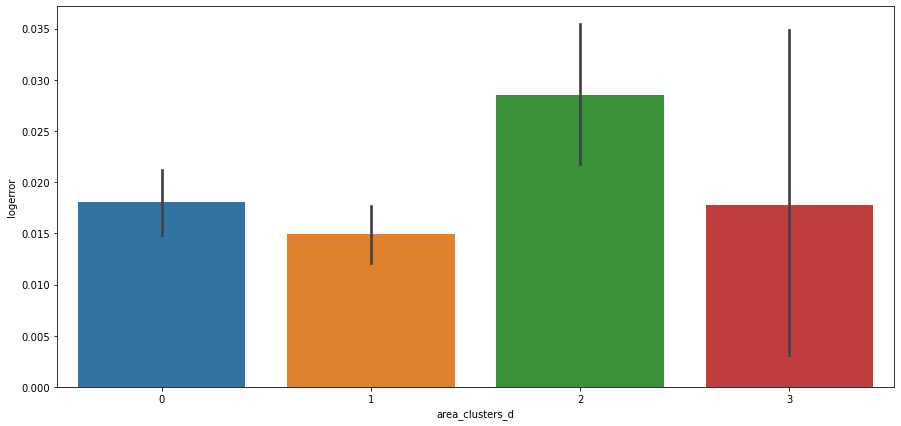

In [56]:
plt.figure(figsize = (15,7))
sns.barplot(x='area_clusters_d', y='logerror', data = train)

## Size Cluster

<span style='background :red' >**Size: bedrooms, bathrooms, full_bath, k==3**</span>

In [57]:
cluster_vars = train[['bedrooms', 'bathrooms', 'full_bath']]

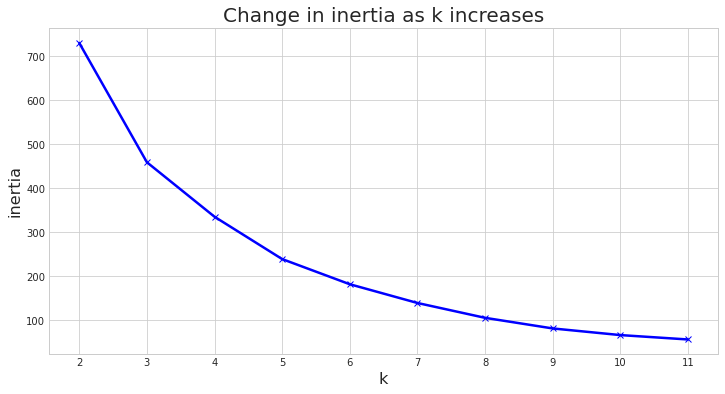

In [58]:
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [59]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)
cluster_vars = train[['bedrooms', 'bathrooms', 'full_bath']]
size_clusters = kmeans.predict(cluster_vars)
train['size_clusters_a'] = size_clusters
train.groupby('size_clusters_a').logerror.mean()

size_clusters_a
0    0.014389
1    0.021802
2    0.016662
Name: logerror, dtype: float64

<AxesSubplot:xlabel='size_clusters_a', ylabel='logerror'>

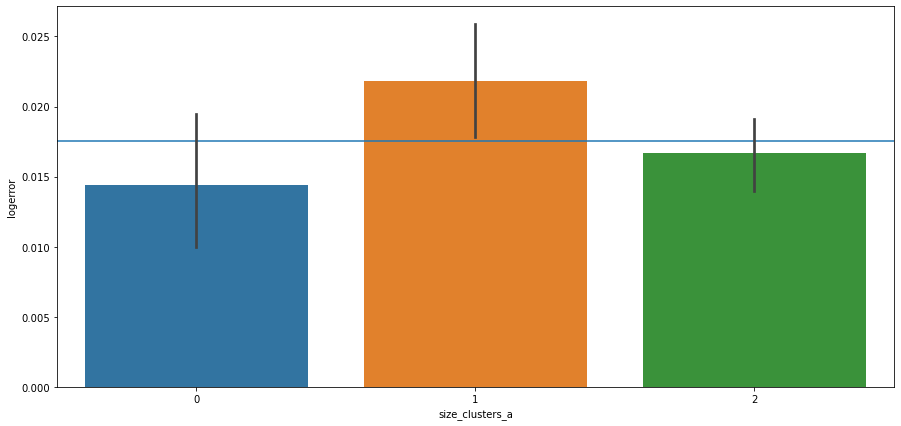

In [60]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='size_clusters_a', y='logerror', data = train)

<span style='background :yellow' >**Size:  bedrooms, bathrooms, full_bath, k==4**</span>

In [61]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['bedrooms', 'bathrooms', 'full_bath']]
size_clusters = kmeans.predict(cluster_vars)
train['size_clusters_b'] = size_clusters
train.groupby('size_clusters_b').logerror.mean()

size_clusters_b
0    0.020273
1    0.015177
2    0.021885
3    0.014115
Name: logerror, dtype: float64

<AxesSubplot:xlabel='size_clusters_b', ylabel='logerror'>

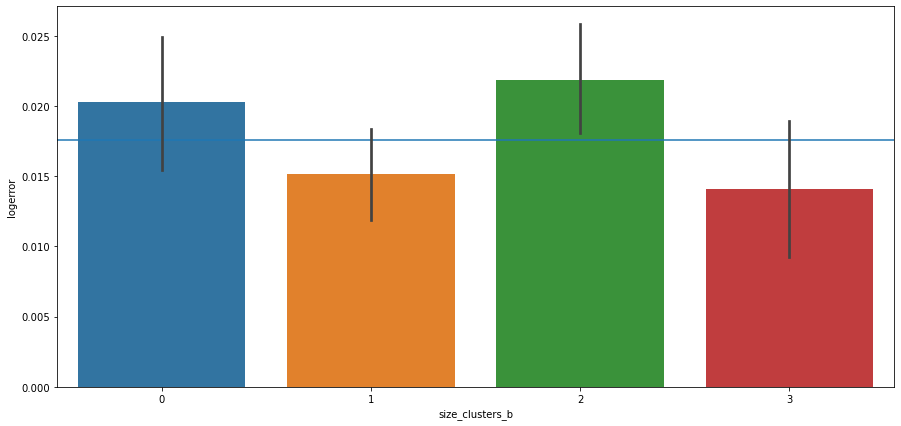

In [62]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='size_clusters_b', y='logerror', data = train)

<span style='background :yellow' >**Size:  bedrooms, bathrooms, full_bath, roomcnt, k==3**</span>

In [63]:
cluster_vars = train[['bedrooms', 'bathrooms', 'full_bath', 'roomcnt']]

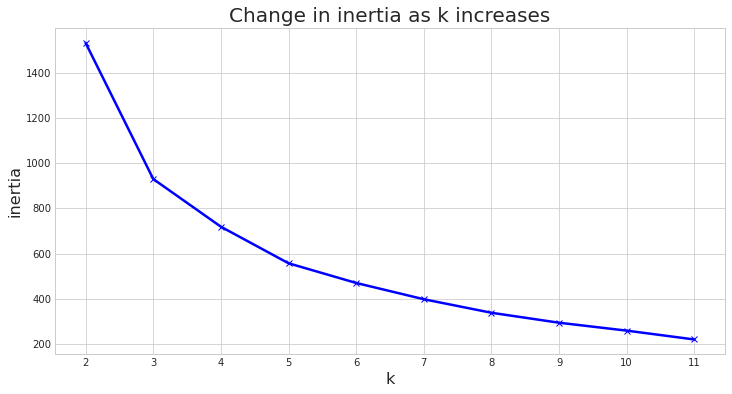

In [64]:
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [65]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)
cluster_vars = train[['bedrooms', 'bathrooms', 'full_bath', 'roomcnt']]
size_clusters = kmeans.predict(cluster_vars)
train['size_clusters_c'] = size_clusters
train.groupby('size_clusters_c').logerror.mean()

size_clusters_c
0    0.012668
1    0.023499
2    0.021078
Name: logerror, dtype: float64

<AxesSubplot:xlabel='size_clusters_c', ylabel='logerror'>

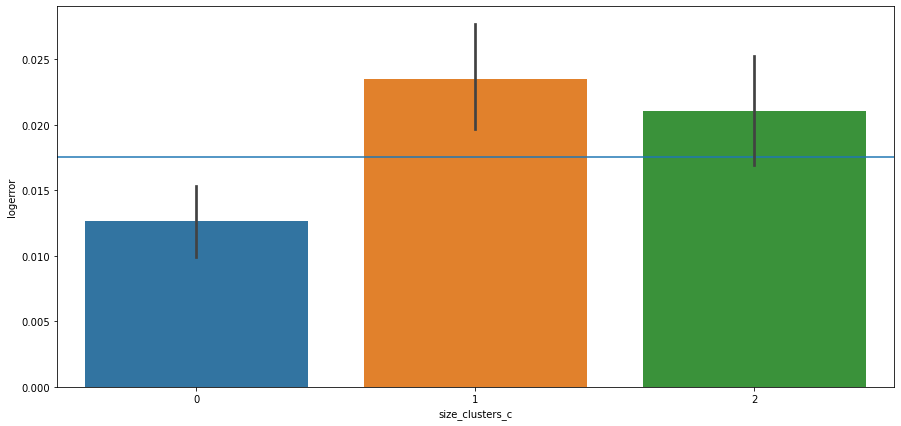

In [66]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='size_clusters_c', y='logerror', data = train)

<span style='background :red' >**Size:  bedrooms, bathrooms, full_bath, roomcnt, k==4**</span>

In [67]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['bedrooms', 'bathrooms', 'full_bath', 'roomcnt']]
size_clusters = kmeans.predict(cluster_vars)
train['size_clusters_d'] = size_clusters
train.groupby('size_clusters_d').logerror.mean()

size_clusters_d
0    0.023111
1    0.014042
2    0.012690
3    0.020156
Name: logerror, dtype: float64

<AxesSubplot:xlabel='size_clusters_d', ylabel='logerror'>

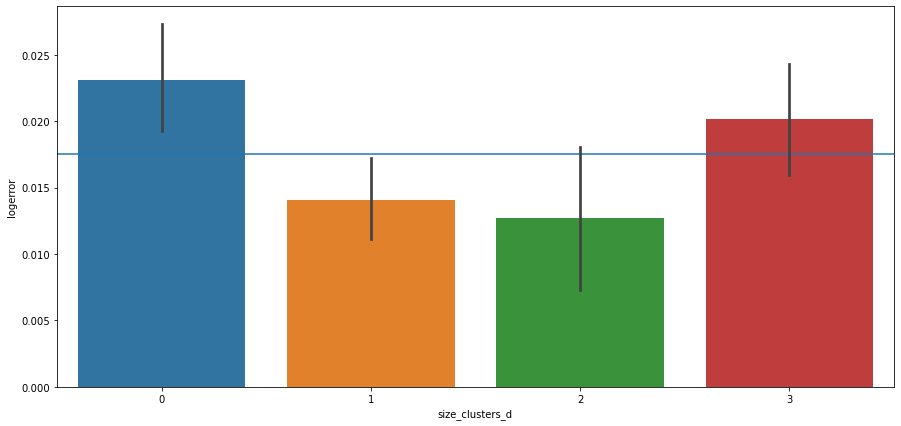

In [68]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='size_clusters_d', y='logerror', data = train)

<span style='background :red' >**Size:  bedrooms, bathrooms, full_bath, roomcnt, k==5**</span>

In [69]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=5)
kmeans.fit(cluster_vars)
cluster_vars = train[['bedrooms', 'bathrooms', 'full_bath', 'roomcnt']]
size_clusters = kmeans.predict(cluster_vars)
train['size_clusters_e'] = size_clusters
train.groupby('size_clusters_e').logerror.mean()

size_clusters_e
0    0.014042
1    0.022597
2    0.020093
3    0.011791
4    0.025512
Name: logerror, dtype: float64

<AxesSubplot:xlabel='size_clusters_e', ylabel='logerror'>

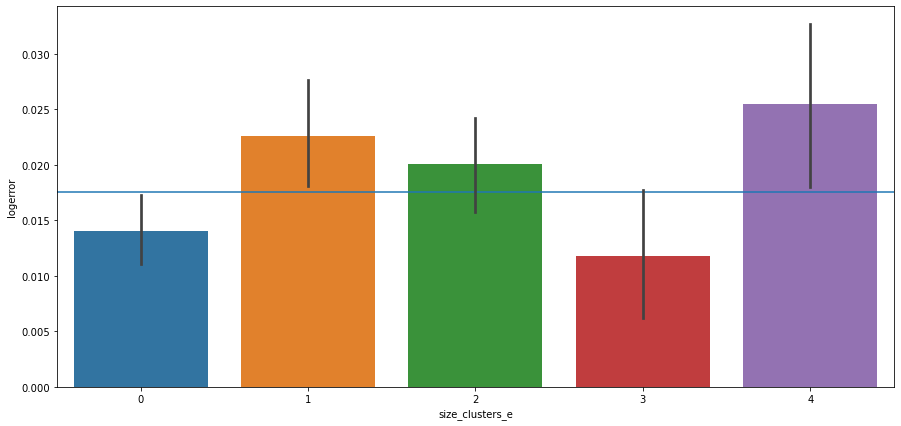

In [70]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='size_clusters_e', y='logerror', data = train)

***

## Value Cluster

<span style='background :red' >**Value:  'structure_value', 'assessed_value', 'land_value','taxamount', k==3**</span>

In [71]:
cluster_vars = train[['structure_value', 'assessed_value', 'land_value','taxamount']]

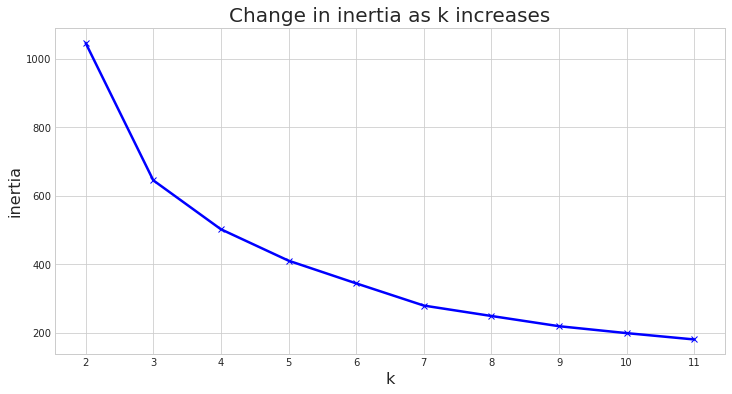

In [72]:
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [73]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)
cluster_vars = train[['structure_value', 'assessed_value', 'land_value','taxamount']]
value_clusters = kmeans.predict(cluster_vars)
train['value_clusters_a'] = value_clusters
train.groupby('value_clusters_a').logerror.mean()

value_clusters_a
0    0.014563
1    0.020450
2    0.016360
Name: logerror, dtype: float64

<AxesSubplot:xlabel='value_clusters_a', ylabel='logerror'>

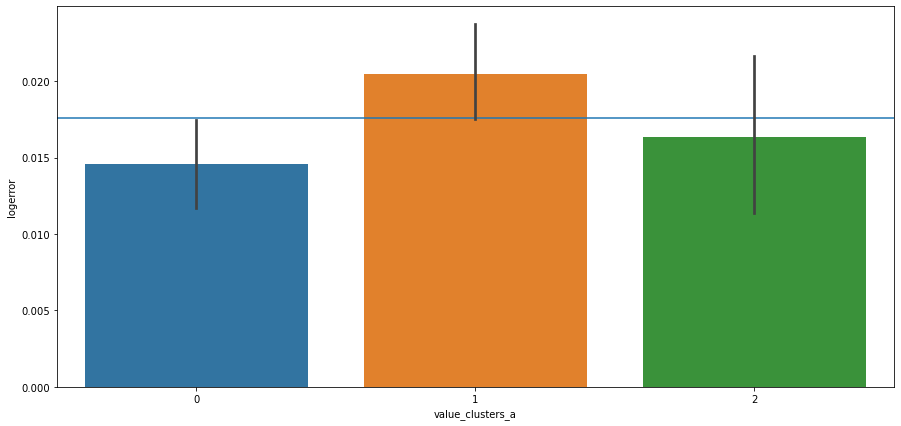

In [74]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='value_clusters_a', y='logerror', data = train)

In [75]:
t, p = stats.ttest_ind(train[train.value_clusters_a==2].logerror, train[train.value_clusters_a==1].logerror)
if p < alpha:
    print('its siginificantly')
    if t>0:
        print('higher than the overall mean error.')
    else:
        print('lower than the overall mean error.')
else:
    print('not significant')

not significant


In [76]:
# Set alpha
alpha = 0.05
cluster0 = train[train.value_clusters_a==0].logerror
cluster1 = train[train.value_clusters_a==1].logerror
cluster2 = train[train.value_clusters_a==2].logerror
# Comparing mean of 3 independent samples
t, p = stats.f_oneway(cluster0, cluster1, cluster2)
if p < alpha:
    print("We reject H0.")
    print(Fore.BLUE + '\nMean of 3 value clusters are not all equal. ')
else:
    print('We fail to reject H0')
    

We reject H0.

Mean of 3 value clusters are not all equal. 


<span style='background :yellow' >**Value:  'structure_value', 'assessed_value', 'land_value','taxamount', k==4**</span>

In [77]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['structure_value', 'assessed_value', 'land_value','taxamount']]
value_clusters = kmeans.predict(cluster_vars)
train['value_clusters_b'] = value_clusters
train.groupby('value_clusters_b').logerror.mean()

value_clusters_b
0    0.017006
1    0.017383
2    0.020073
3    0.014411
Name: logerror, dtype: float64

<AxesSubplot:xlabel='value_clusters_b', ylabel='logerror'>

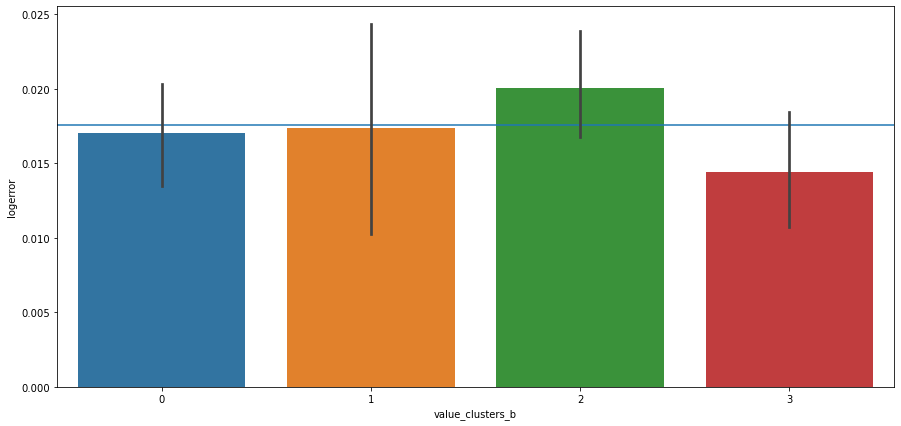

In [78]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='value_clusters_b', y='logerror', data = train)

<span style='background :yellow' >**Value:  'structure_value', 'assessed_value', 'land_value','taxamount', k==5**</span>

In [79]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=5)
kmeans.fit(cluster_vars)
cluster_vars = train[['structure_value', 'assessed_value', 'land_value','taxamount']]
value_clusters = kmeans.predict(cluster_vars)
train['value_clusters_c'] = value_clusters
train.groupby('value_clusters_c').logerror.mean()

value_clusters_c
0    0.019788
1    0.012987
2    0.016695
3    0.017173
4    0.023111
Name: logerror, dtype: float64

<AxesSubplot:xlabel='value_clusters_c', ylabel='logerror'>

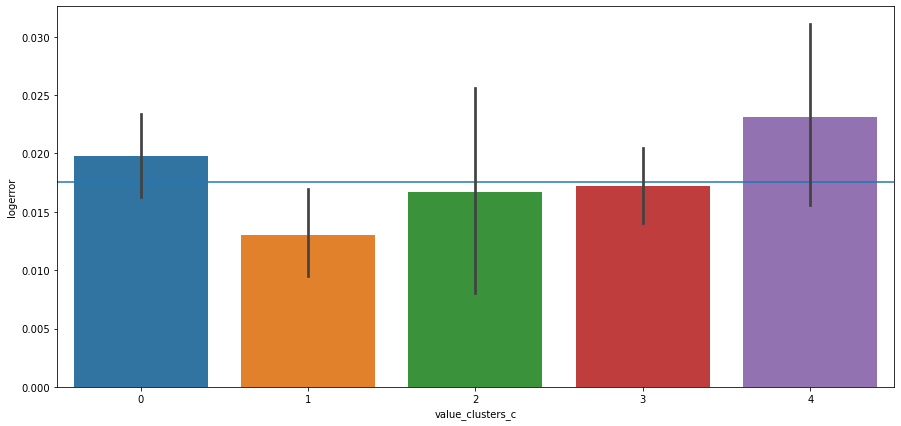

In [80]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='value_clusters_c', y='logerror', data = train)

<span style='background :yellow' >**Value:  'structure_value', 'assessed_value', 'land_value', k==3**</span>

In [81]:
cluster_vars = train[['structure_value', 'assessed_value', 'land_value']]

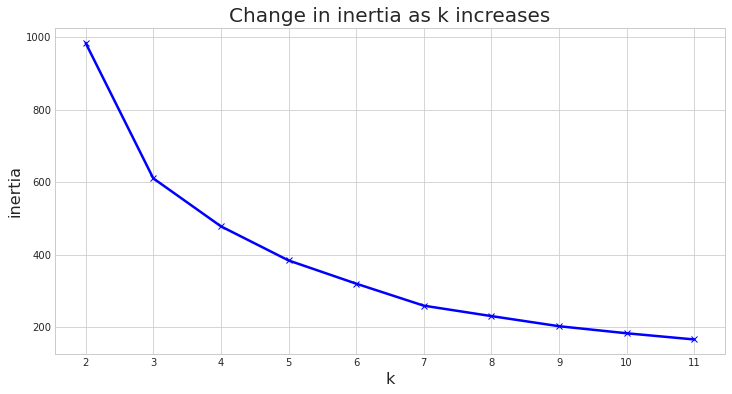

In [82]:
# Using the elbow method to visually select a good value for k.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(12, 6))
    pd.Series({k: KMeans(k).fit(cluster_vars).inertia_ for k in range(2, 12)}).plot(marker='x', color = 'blue', linewidth = 2.5)
    plt.xticks(range(2, 12))
    plt.xlabel('k', fontsize = 16)
    plt.ylabel('inertia', fontsize = 16)
    plt.title('Change in inertia as k increases', fontsize = 20)

In [83]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=3)
kmeans.fit(cluster_vars)
cluster_vars = train[['structure_value', 'assessed_value', 'land_value']]
value_clusters = kmeans.predict(cluster_vars)
train['value_clusters_d'] = value_clusters
train.groupby('value_clusters_d').logerror.mean()

value_clusters_d
0    0.016356
1    0.020380
2    0.014616
Name: logerror, dtype: float64

<AxesSubplot:xlabel='value_clusters_d', ylabel='logerror'>

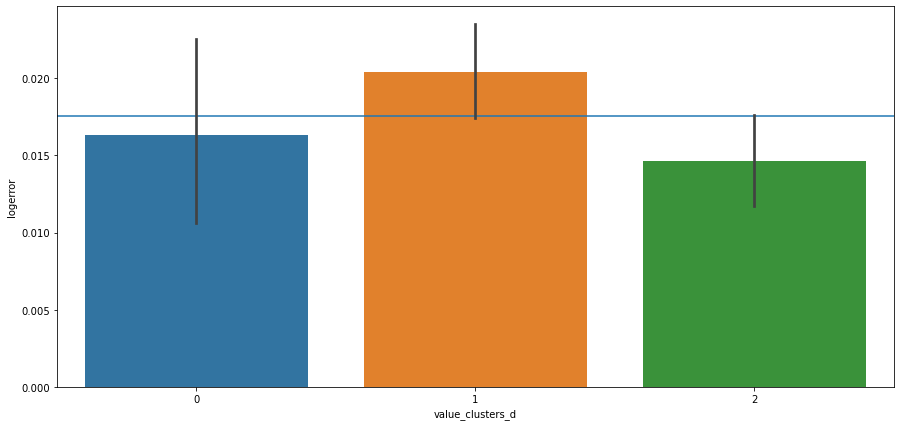

In [84]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='value_clusters_d', y='logerror', data = train)

<span style='background :yellow' >**Value:  'structure_value', 'assessed_value', 'land_value', k==4**</span>

In [85]:
# Create clusters and fit cluster model
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_vars)
cluster_vars = train[['structure_value', 'assessed_value', 'land_value']]
value_clusters = kmeans.predict(cluster_vars)
train['value_clusters_e'] = value_clusters
train.groupby('value_clusters_e').logerror.mean()

value_clusters_e
0    0.013817
1    0.019830
2    0.017540
3    0.017537
Name: logerror, dtype: float64

<AxesSubplot:xlabel='value_clusters_e', ylabel='logerror'>

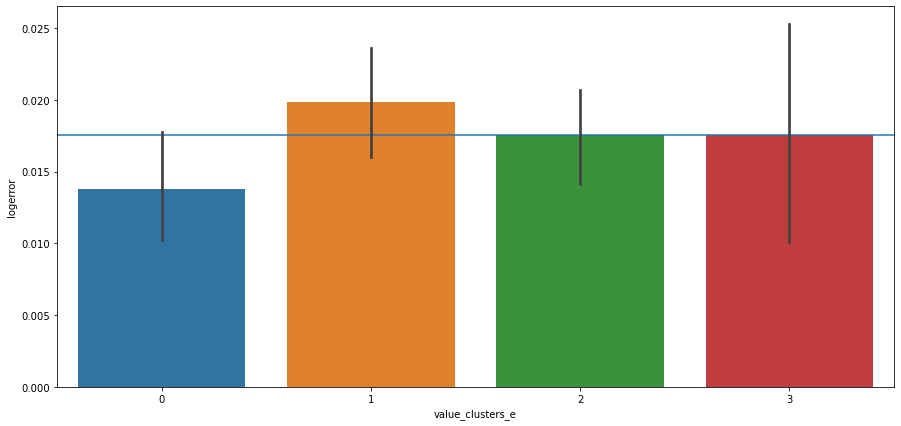

In [86]:
plt.figure(figsize = (15,7))
plt.axhline(train.logerror.mean())
sns.barplot(x='value_clusters_e', y='logerror', data = train)